<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r5_i3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r5/4-fft-normal-n-0-6-9-15-r5.csv?token=AKVFSOCERZWIU3KWMRJOA7K64IAPY')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r5/4-fft-malicious-n-0-6-9-15-m-1-11-r5.csv?token=AKVFSOGI7IRFFQWPSDFY7K264IAP4')


In [0]:
df = df1.append(df2, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [12]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,80,4,2,1,1,4,3,9,6,6,24,8,5,3,1,0.333333,8,108,1,108,108,8,20,3,27,1
1,80,4,2,1,1,4,3,9,6,6,24,8,7,3,1,0.333333,8,175,1,175,175,8,28,3,27,0
2,102,1,2,4,1,1,5,17,23,7,9,9,3,3,2,0.666667,12,107,2,108,214,2,12,20,340,1
3,103,1,2,4,2,2,5,17,23,7,9,9,3,3,2,0.666667,13,106,3,108,318,2,48,20,340,1
4,104,1,2,4,3,2,5,17,23,7,9,9,3,3,2,0.666667,14,105,4,108,420,2,72,20,340,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236333,3278965,2,4,4,1,1,5,17,20,4,15,15,60216,5,1,0.200000,9,5,14,18,70,8,240864,20,340,0
236334,3278966,2,4,4,2,2,5,17,20,4,15,15,60216,5,1,0.200000,10,4,15,18,60,8,963456,20,340,0
236335,3278967,2,4,4,3,2,5,17,20,4,15,15,60216,5,1,0.200000,11,3,16,18,48,8,1445184,20,340,0
236336,3278968,2,4,4,4,2,5,17,20,4,15,15,60216,5,1,0.200000,12,2,17,18,34,8,1926912,20,340,0


In [13]:
df.shape

(236338, 26)

Test Data

In [0]:
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r5/4-fft-malicious-n-0-6-9-15-m-1-12-r5.csv?token=AKVFSODXRV4CVCNE53U2EQ264IAQA')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r5/4-fft-malicious-n-0-6-9-15-m-1-7-r5.csv?token=AKVFSOBQ5MKQHIV6XDGFJUK64IAQG')
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r5/4-fft-malicious-n-0-6-9-15-m-11-12-r5.csv?token=AKVFSOHDOIHYUVOJJK4ZL6264IAQK')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r5/4-fft-malicious-n-0-6-9-15-m-7-11-r5.csv?token=AKVFSOFFFOCILTHOTTIP7XS64IAQO')
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r5/4-fft-malicious-n-0-6-9-15-m-7-12-r5.csv?token=AKVFSOGGMXIXWZYZVZNUDD264IAQS')

In [15]:
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)

(145562, 26)
(157463, 26)
(124211, 26)
(136324, 26)
(134358, 26)


Processing

In [16]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [18]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.184848,-0.034531,-0.005003,0.007592,0.046937,0.043164,0.015328,0.271753,0.058981,-0.247683,-0.027409,-0.004239,-0.024310,-0.021172,-0.023129,0.541796,-0.003228,0.011311,0.035309,-0.067051
inport,-0.184848,1.000000,-0.175386,0.012644,-0.019189,0.346040,0.307519,-0.070650,0.072852,-0.244273,-0.133949,-0.337440,-0.027730,-0.067264,-0.070448,-0.066264,0.680029,-0.082582,0.146564,0.278883,0.032929
cache_coherence_type,-0.034531,-0.175386,1.000000,0.182026,-0.276241,-0.243513,-0.247405,0.047142,-0.056942,-0.087952,-0.141031,-0.119625,0.034062,0.006377,0.029990,0.027765,-0.183690,0.276461,0.596090,0.083926,0.002406
flit_id,-0.005003,0.012644,0.182026,1.000000,-0.014945,0.255131,0.241530,0.006831,0.029301,0.010531,0.000455,0.353019,-0.022122,0.020202,-0.001424,-0.001728,-0.007530,0.626124,0.356405,0.316296,-0.009006
flit_type,0.007592,-0.019189,-0.276241,-0.014945,1.000000,-0.387185,-0.366544,-0.010366,-0.044468,-0.015981,-0.000691,0.331102,-0.021692,0.024945,0.002413,0.003321,0.011427,0.150654,-0.540879,-0.480009,0.013668
vnet,0.046937,0.346040,-0.243513,0.255131,-0.387185,1.000000,0.989142,-0.023334,0.190889,0.067559,0.018597,-0.446907,-0.024746,0.007244,-0.012980,-0.022700,0.282609,-0.028133,0.633592,0.942618,-0.072704
vc,0.043164,0.307519,-0.247405,0.241530,-0.366544,0.989142,1.000000,-0.019267,0.170262,0.024787,-0.030633,-0.431406,-0.020452,0.018919,-0.001136,-0.011138,0.250032,-0.029465,0.621499,0.941954,-0.076586
traversal_id,0.015328,-0.070650,0.047142,0.006831,-0.010366,-0.023334,-0.019267,1.000000,0.009568,0.032357,0.019972,0.044596,0.129076,0.130041,0.192163,0.136484,-0.043774,0.569452,0.018287,-0.006731,-0.299872
hop_count,0.271753,0.072852,-0.056942,0.029301,-0.044468,0.190889,0.170262,0.009568,1.000000,0.469031,-0.146521,0.040028,-0.022057,-0.043463,-0.048590,-0.041490,0.226295,-0.008021,0.112603,0.165616,-0.020839
current_hop,0.058981,-0.244273,-0.087952,0.010531,-0.015981,0.067559,0.024787,0.032357,0.469031,1.000000,0.722330,0.282819,0.011101,-0.010607,0.000366,-0.003910,-0.183271,-0.009646,-0.014230,0.014738,-0.066137


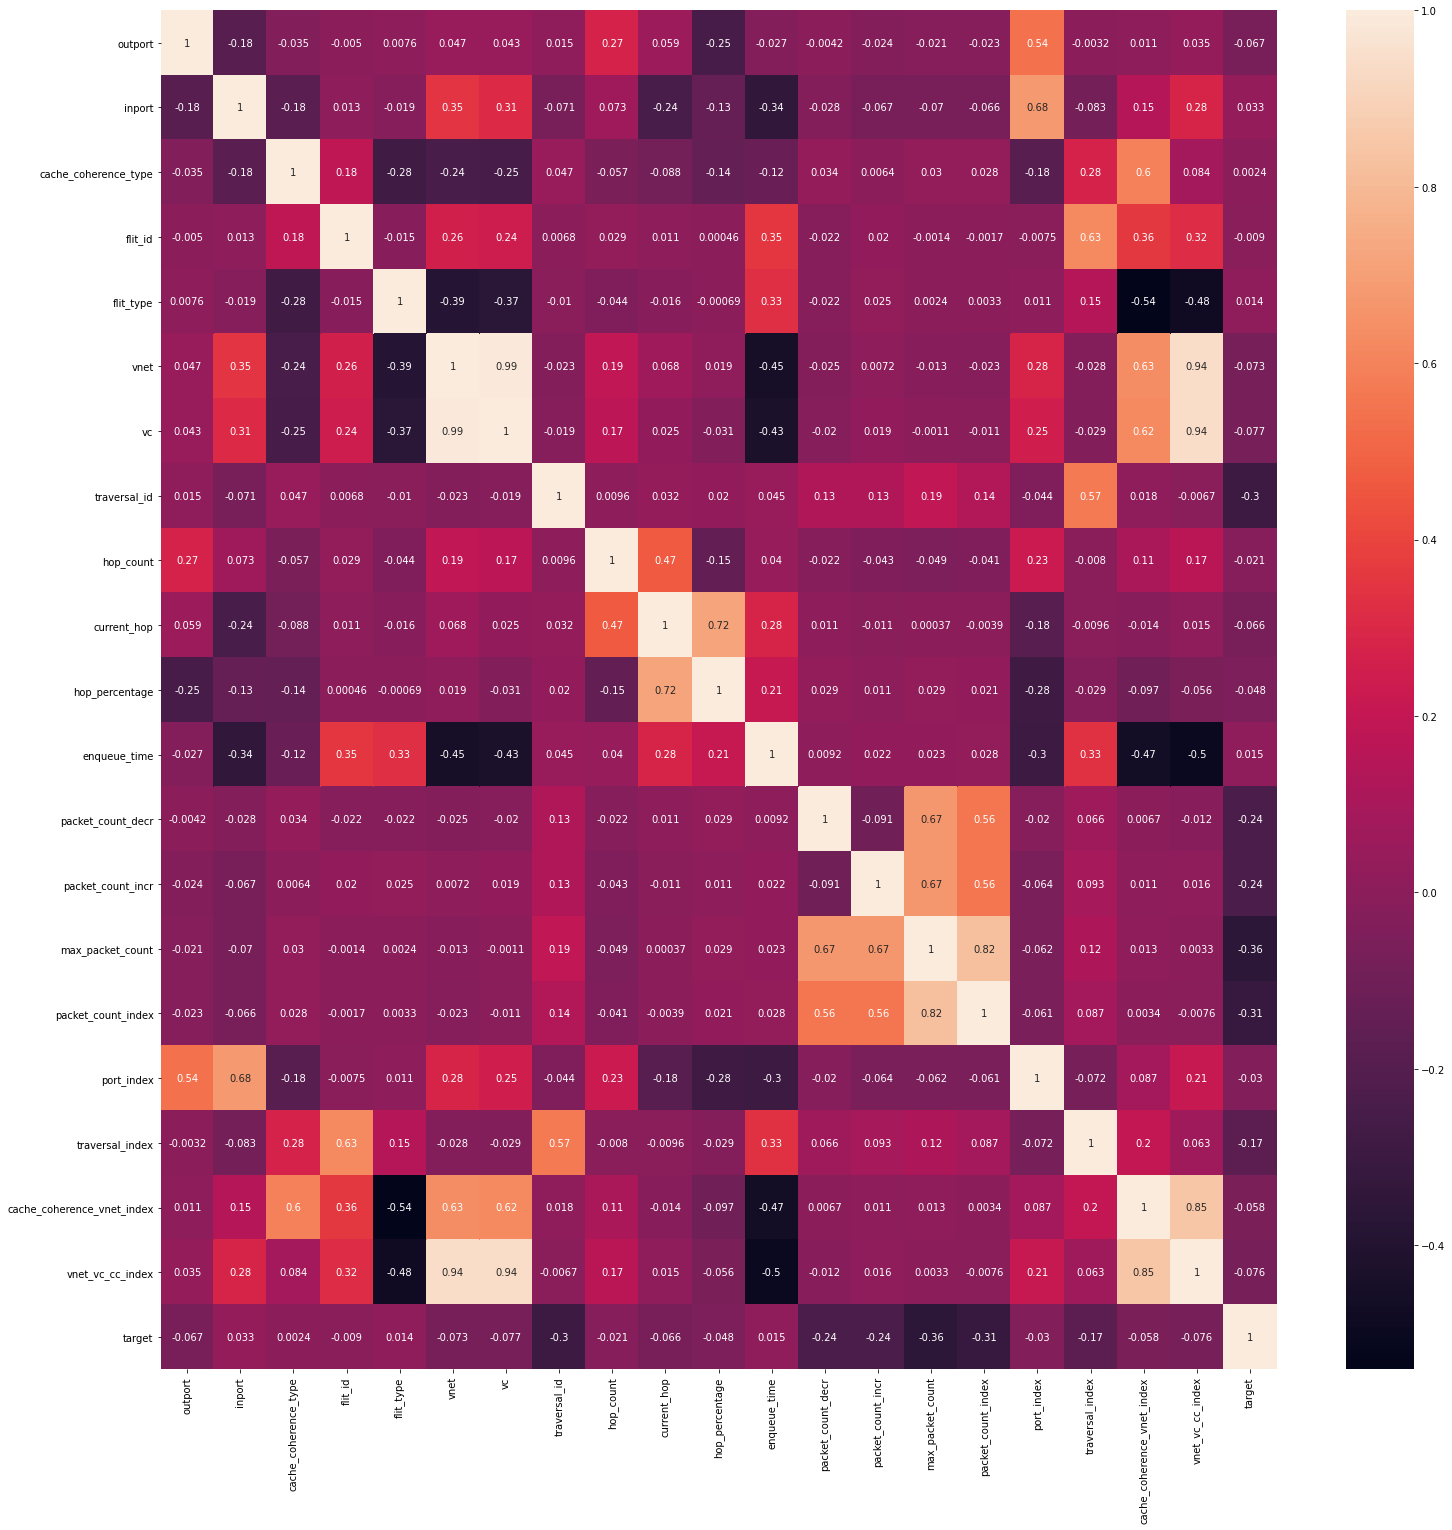

In [19]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [21]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet_vc_cc_index', 'vnet']

In [0]:
df = df.drop(columns=['inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])

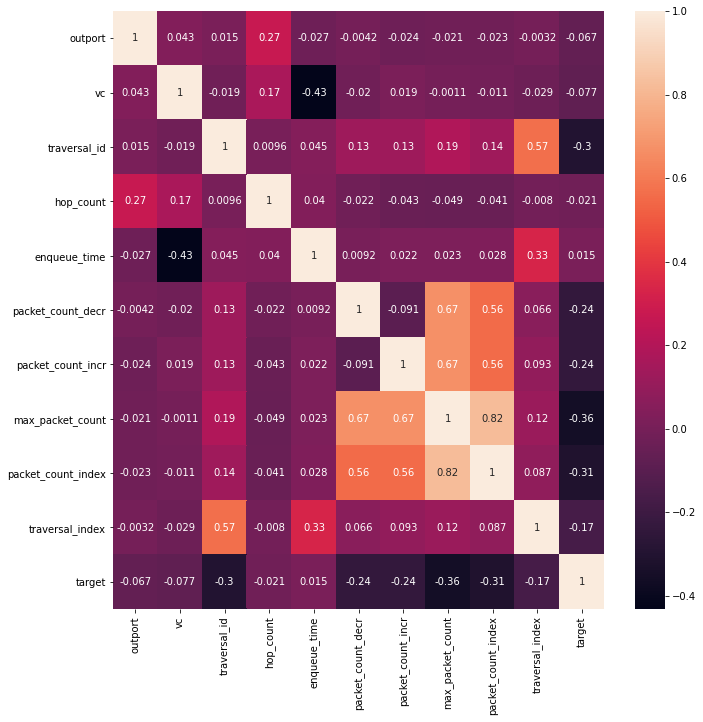

In [23]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot = True)
plt.show()

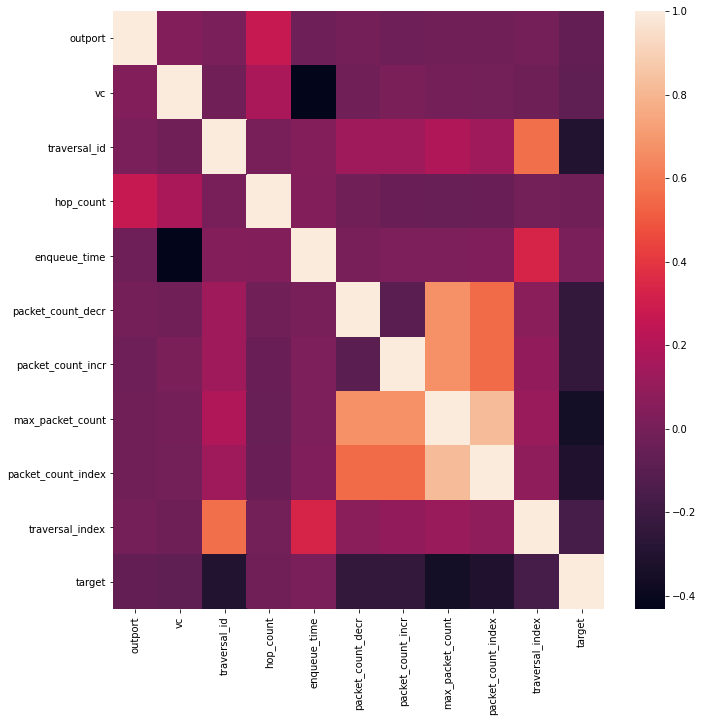

In [24]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [26]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,1.00,0.000000,0.000066,0.5,0.061538,0.397770,0.000000,0.397770,0.005828,0.000003
1,1.00,0.000000,0.000100,0.5,0.061538,0.646840,0.000000,0.646840,0.009478,0.000004
2,0.25,0.888889,0.000033,0.5,0.123077,0.394052,0.003717,0.397770,0.011602,0.000001
3,0.25,0.888889,0.000033,0.5,0.138462,0.390335,0.007435,0.397770,0.017267,0.000008
4,0.25,0.888889,0.000033,0.5,0.153846,0.386617,0.011152,0.397770,0.022823,0.000013
...,...,...,...,...,...,...,...,...,...,...
236333,0.50,0.888889,1.000000,1.0,0.076923,0.014870,0.048327,0.063197,0.003758,0.044473
236334,0.50,0.888889,1.000000,1.0,0.092308,0.011152,0.052045,0.063197,0.003214,0.177892
236335,0.50,0.888889,1.000000,1.0,0.107692,0.007435,0.055762,0.063197,0.002560,0.266839
236336,0.50,0.888889,1.000000,1.0,0.123077,0.003717,0.059480,0.063197,0.001797,0.355786


In [27]:
train_X[train_X.duplicated()].shape

(12, 10)

In [28]:
test_X = df3.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y = df3['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 10)


,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,1.00,0.000000,0.000100,0.5,0.054795,0.790795,0.000000,0.790795,0.013017,4.429241e-06
1,0.75,0.888889,0.000017,0.5,0.109589,0.786611,0.004184,0.790795,0.025966,7.382068e-07
2,0.75,0.888889,0.000017,0.5,0.123288,0.782427,0.008368,0.790795,0.038777,5.167447e-06
3,0.75,0.888889,0.000017,0.5,0.136986,0.778243,0.012552,0.790795,0.051450,8.120275e-06
4,0.75,0.888889,0.000017,0.5,0.150685,0.774059,0.016736,0.790795,0.063985,1.107310e-05
...,...,...,...,...,...,...,...,...,...,...
145557,0.50,0.888889,1.000000,1.0,0.068493,0.016736,0.054393,0.071130,0.004752,4.447253e-02
145558,0.50,0.888889,1.000000,1.0,0.082192,0.012552,0.058577,0.071130,0.004064,1.778923e-01
145559,0.50,0.888889,1.000000,1.0,0.095890,0.008368,0.062762,0.071130,0.003237,2.668389e-01
145560,0.50,0.888889,1.000000,1.0,0.109589,0.004184,0.066946,0.071130,0.002273,3.557854e-01


In [29]:
test_X1 = df4.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y1 = df4['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 10)


In [30]:
test_X2 = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y2 = df5['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 10)


In [31]:
test_X3 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y3 = df6['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)

(0, 10)


In [32]:
test_X4 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y4 = df7['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)

(0, 10)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

Labels

1.   0 -  malicious
2.   1 -  good



In [34]:
train_Y = df['target']
train_Y.value_counts()

0    147203
1     89135
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.33, random_state=seed, shuffle=True)

Feature Selection

                Specs        Score
7    max_packet_count  2485.266073
2        traversal_id  2380.761672
8  packet_count_index  2293.205489
5   packet_count_decr  1252.069076
6   packet_count_incr  1233.228446
9     traversal_index   721.036658
1                  vc   372.950019
0             outport    97.044813
3           hop_count     9.580552
4        enqueue_time     5.014885


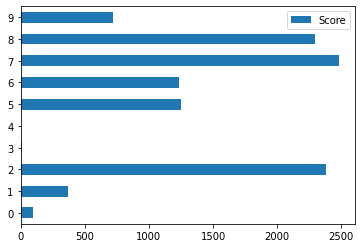

In [37]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k='all')
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [39]:
dt = DecisionTreeClassifier(max_depth=20,max_features=10,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r1.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [42]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 98.53295946850568
Test Prediction Score 97.86516565801621


In [43]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 87.21026091974554
Test Prediction Score 87.94955005302833
Test Prediction Score 84.05535741600985
Test Prediction Score 84.22434787711627
Test Prediction Score 83.17108024829187


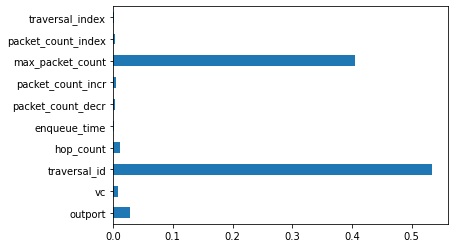

In [44]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

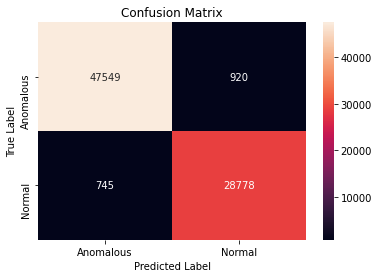

In [45]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [46]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     48469
           1       0.97      0.97      0.97     29523

    accuracy                           0.98     77992
   macro avg       0.98      0.98      0.98     77992
weighted avg       0.98      0.98      0.98     77992



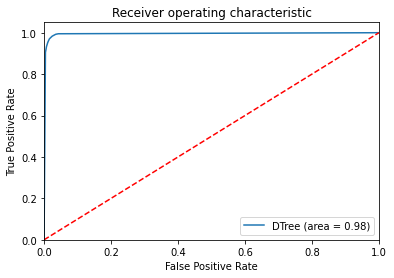

In [47]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [49]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r5l-i3.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [52]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.99747388629963
Test Prediction Score 99.78459329161964


In [53]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 89.29184814718127
Test Prediction Score 90.46823698265625
Test Prediction Score 85.56086014926214
Test Prediction Score 85.76699627358352
Test Prediction Score 83.93247889965613


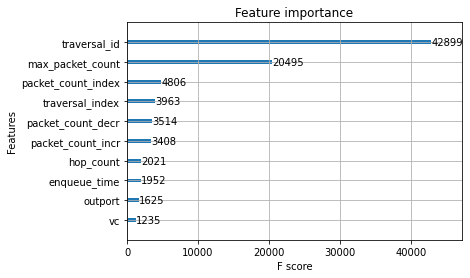

In [54]:
plot_importance(xgbc)
plt.show()

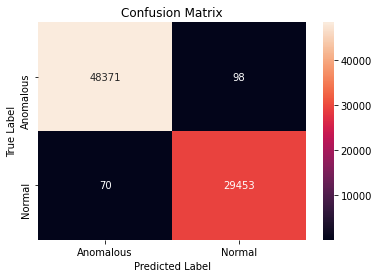

In [55]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [56]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48469
           1       1.00      1.00      1.00     29523

    accuracy                           1.00     77992
   macro avg       1.00      1.00      1.00     77992
weighted avg       1.00      1.00      1.00     77992



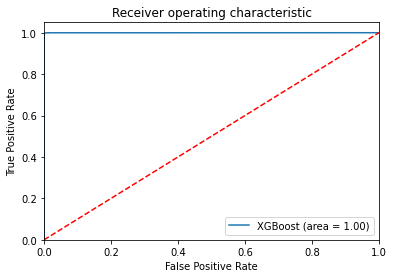

In [57]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()